In [1]:
import numpy as np
import cv2
import os
import sys
import matplotlib.pyplot as plt
import serial
import time
from IPython.display import clear_output

%matplotlib inline
sys.path.insert(0, os.path.join(os.getcwd(), 'src'))

from Thymio import Thymio

import vision
import globalNavigation
import utils
import kalman

# Main


In [2]:
#RUN ONLY ONCE PER KERNEL START TO AVOID BUGS
%matplotlib inline
th = Thymio.serial(port="/dev/cu.usbmodem14401", refreshing_rate=0.1)
cap = vision.VideoCapture("http://192.168.13.124:8080/video")

path original:
[[83 82 81 80 79 78 77 76 75 74 73 72 71 70 69 68 67 66 65 64 63 62 61 60
  59 58 57 56 55 54 53 52 51 50 49 48 47 46 45 44 43 42 41 40 39 38 37 36
  35 34 33 32 31 30 29 28 27 26 25 24 23]
 [13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13
  13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13
  13 13 13 13 13 13 13 13 13 13 13 13 14]]
path simple:
[[1196, 187], [331, 202]]
path index: 0
angleToTurn: -3.148662403549398
[   0.    0. 1401.    0.    0.]
[   0.    0. 1401.    0.    0.]
front
path original:
[[51 50 49 48 47 46 45 44 43 42 41 40 39 38 37 36 35 34 33 32 31 30 29 28
  27 26 25 24 23]
 [12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
  12 13 13 13 14]]
path simple:
[[735, 173], [331, 202]]
path index: 0
angleToTurn: -62.65903270464762


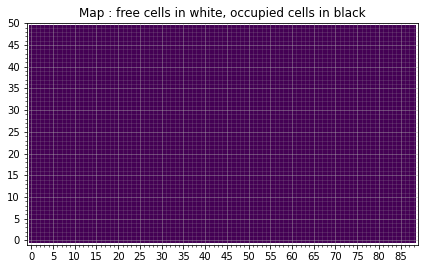

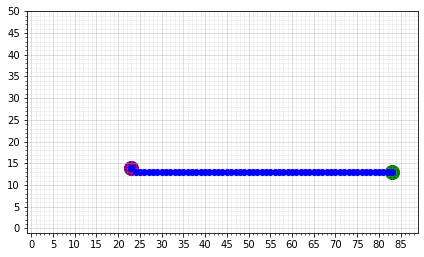

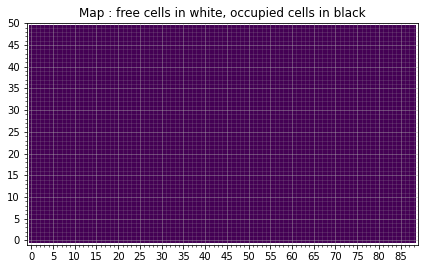

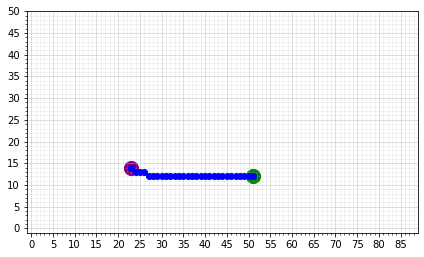

In [6]:
import importlib
importlib.reload(vision)
importlib.reload(globalNavigation)
importlib.reload(utils)
importlib.reload(kalman)

reachedEnd = False

while not reachedEnd:
    
    ourThymio = utils.virtualThymio(cap,th)
    path = utils.analyze(ourThymio)
    print('path original:')
    print(path)
    tempPath = globalNavigation.transformPath(path)
    simplePath = globalNavigation.pathSimplifier(tempPath)
    print('path simple:')
    print(simplePath)

    reachedEnd = globalNavigation.followPath(ourThymio, simplePath)
    


# Manual Debug

#### Read image and display it

<Figure size 432x288 with 0 Axes>

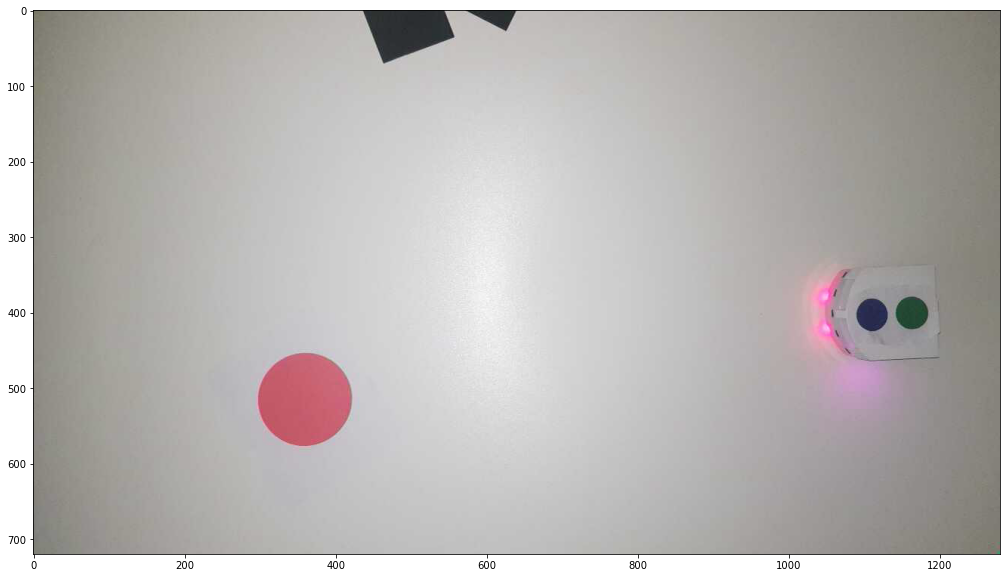

In [7]:
#RUN CELL 1 TO HAVE IMPORTS
%matplotlib inline
capDebug = vision.VideoCapture("http://192.168.13.124:8080/video")

plt.figure()
viewCam = False

while viewCam:
    frameDebug = capDebug.read()
    frameDebug = cv2.cvtColor(frameDebug,cv2.COLOR_BGR2RGB)
    plt.imshow(frameDebug)
    plt.show()
    time.sleep(1)
    clear_output()
    
raw_frame = capDebug.read()
plt.figure(figsize = (50,10))
plt.imshow(cv2.cvtColor(raw_frame,cv2.COLOR_BGR2RGB))
plt.show()


In [4]:
th.set_var('motor.left.target', 0)
th.set_var('motor.right.target', 0)

Exception in thread Thread-5:
Traceback (most recent call last):
  File "/Users/ken/anaconda3/envs/opencv4/lib/python3.9/site-packages/serial/serialposix.py", line 621, in write
    n = os.write(self.fd, d)
OSError: [Errno 6] Device not configured

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/ken/anaconda3/envs/opencv4/lib/python3.9/threading.py", line 950, in _bootstrap_inner
    self.run()
  File "/Users/ken/anaconda3/envs/opencv4/lib/python3.9/threading.py", line 888, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/ken/Dropbox/EPFL/Basics_of_Mobile_Robotics/Project/EPFL_MoRo_Project/src/Thymio.py", line 340, in do_refresh
    self.get_variables()
  File "/Users/ken/Dropbox/EPFL/Basics_of_Mobile_Robotics/Project/EPFL_MoRo_Project/src/Thymio.py", line 499, in get_variables
    self.send(msg)
  File "/Users/ken/Dropbox/EPFL/Basics_of_Mobile_Robotics/Project/EPFL_MoRo_Project/src/Thymio.py", li

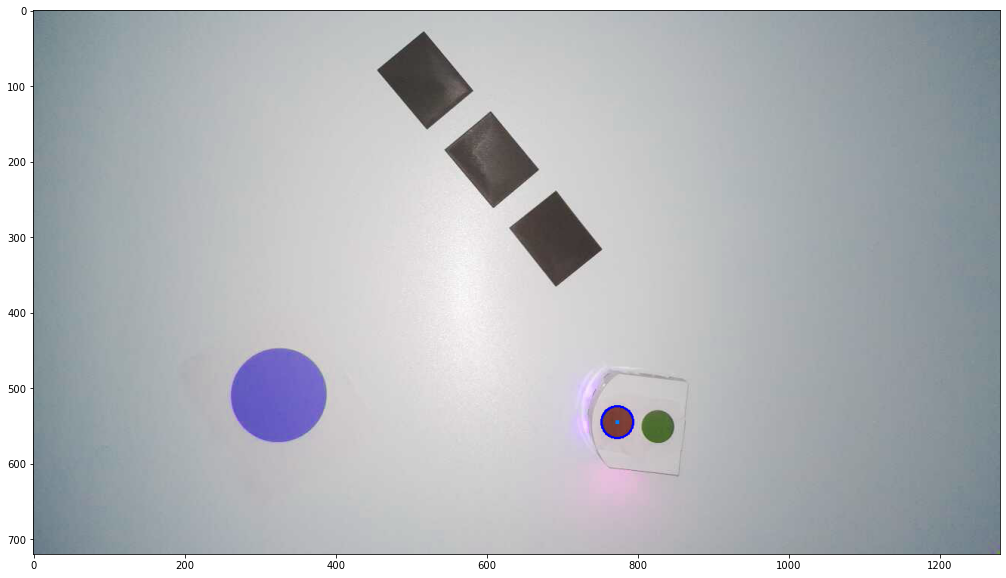

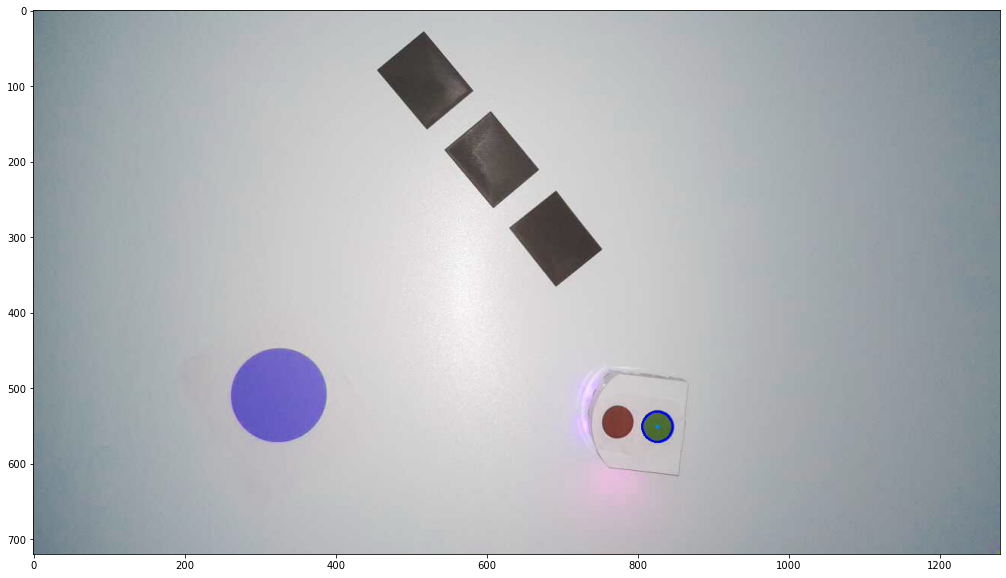

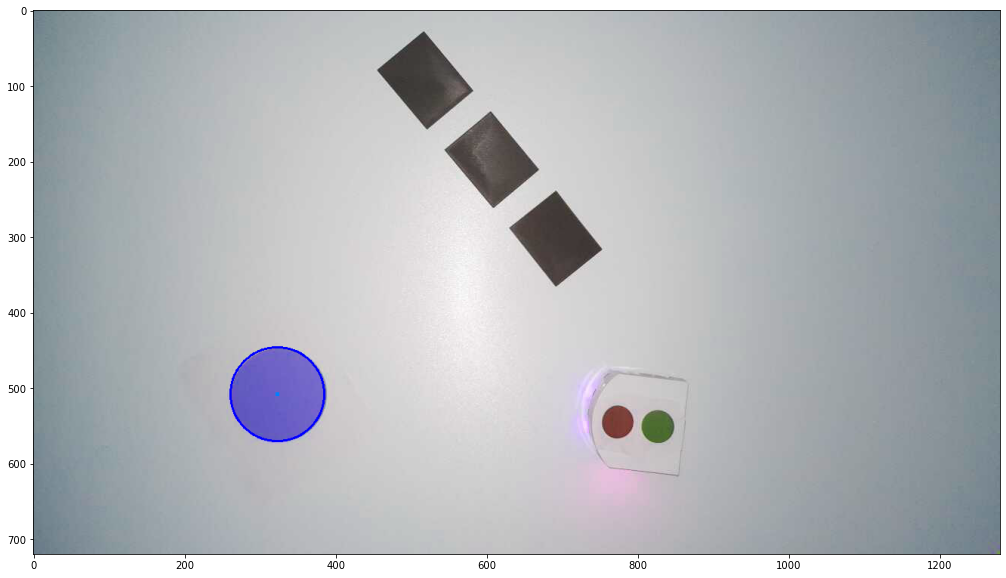

In [18]:
importlib.reload(vision)
%matplotlib inline
frame = raw_frame.copy()
robot_front_absolute, front_image = vision.find_thymio_front(frame)
robot_center_absolute, center_image = vision.find_thymio_center(frame)
destination_center_absolute, destination_image = vision.find_destination_center(frame)
plt.figure(figsize = (50,10))
plt.imshow(front_image)
plt.show()
plt.figure(figsize = (50,10))
plt.imshow(center_image)
plt.show()
plt.figure(figsize = (50,10))
plt.imshow(destination_image)
plt.show()

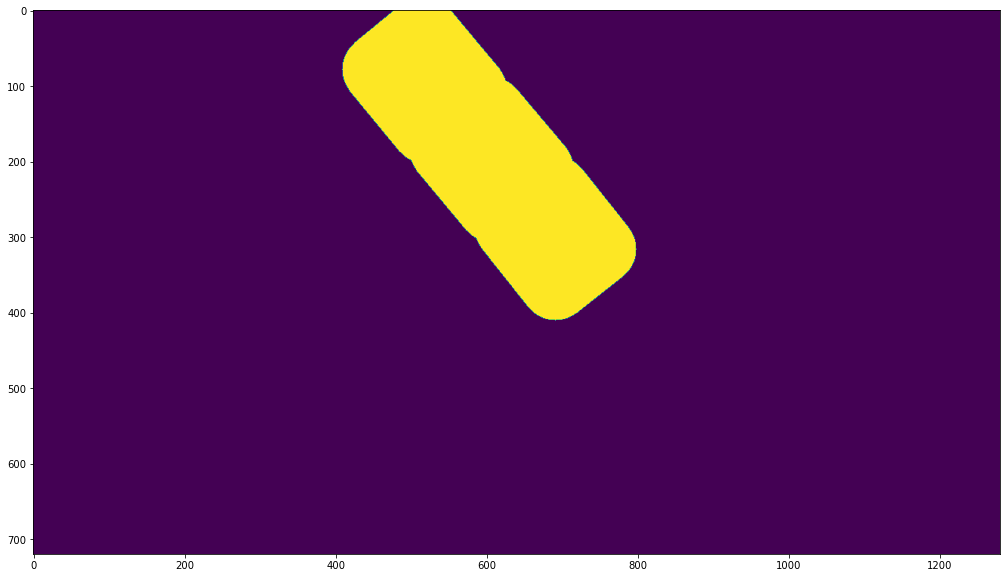

In [19]:
importlib.reload(vision)
%matplotlib inline
importlib.reload(vision)
output_objects = vision.find_objects(frame)
output_objects = cv2.cvtColor(output_objects, cv2.COLOR_BGR2GRAY)
plt.figure(figsize = (50,10))
plt.imshow(output_objects)
plt.show()

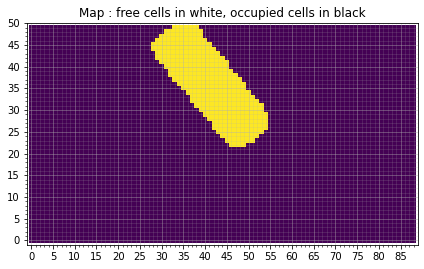

In [20]:
importlib.reload(globalNavigation)
occupancy_grid, cmap = globalNavigation.display_occupancy_grid(output_objects)

array([[70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55,
        54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39,
        38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23,
        22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,
         6,  5],
       [ 5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
         5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
         5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
         5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
         5,  5]])

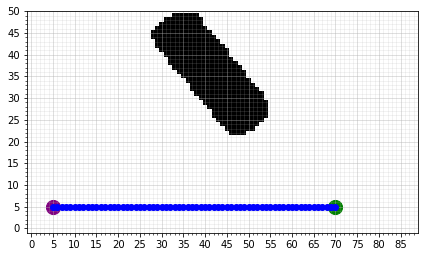

In [22]:
# Define the start and end goal
start = (70,5)
goal = (5,5)

globalNavigation.runAstar(start, goal, utils.A_STAR_Y_AXIS_SIZE, occupancy_grid, cmap)

In [96]:
th.set_var('motor.left.target', 50)
th.set_var('motor.right.target', 50)

In [12]:
th.set_var('motor.left.target', 0)
th.set_var('motor.right.target', 0)

In [10]:
import localNavigation
importlib.reload(vision)
importlib.reload(globalNavigation)
importlib.reload(utils)
importlib.reload(localNavigation)

localNavigation.set_motor(0,0,ourThymio)

In [38]:
#with 100 and -100 speed, rotation takes 8.76 sec
#forward value is 37.95

[[[296.        ]
  [266.        ]
  [  1.37908851]
  [ 37.92493395]]

 [[293.        ]
  [266.        ]
  [  2.75272965]
  [ 37.85003275]]

 [[293.        ]
  [266.        ]
  [  2.70382555]
  [ 37.85355766]]

 [[293.        ]
  [272.        ]
  [  2.75272965]
  [ 37.85003275]]

 [[295.        ]
  [295.        ]
  [  2.70382555]
  [ 37.85355766]]

 [[296.        ]
  [315.        ]
  [  2.06692752]
  [ 37.89367112]]

 [[299.        ]
  [337.        ]
  [  2.06692752]
  [ 37.89367112]]

 [[298.        ]
  [358.        ]
  [  2.75272965]
  [ 37.85003275]]

 [[301.        ]
  [381.        ]
  [  2.10508724]
  [ 37.8915704 ]]

 [[302.        ]
  [400.        ]
  [  1.99460772]
  [ 37.89754662]]

 [[303.        ]
  [423.        ]
  [  1.37908851]
  [ 37.92493395]]

 [[303.        ]
  [443.        ]
  [  3.37496705]
  [ 37.79963092]]

 [[304.        ]
  [464.        ]
  [  3.37496705]
  [ 37.79963092]]

 [[307.        ]
  [487.        ]
  [  2.80343047]
  [ 37.84631128]]

 [[307.        ]
  [

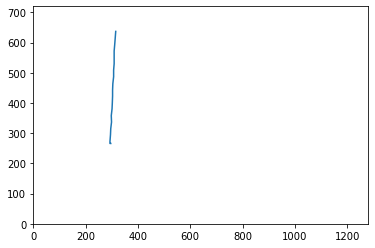

In [39]:
#CODE TO MEASURE THYMIO POSITION AND PLOT IT

importlib.reload(vision)
importlib.reload(globalNavigation)
importlib.reload(utils)

ourThymio = utils.virtualThymio(cap,th)

ourThymio.th.set_var('motor.left.target', 50)
ourThymio.th.set_var('motor.right.target', 50)

#th.set_var('motor.left.target', 2**16-50)
#th.set_var('motor.right.target', 2**16-50)


ps=np.array([ourThymio.readKalman()])
for _ in range(20):
    ps = np.append(ps, [ourThymio.readKalman()], axis = 0)
    time.sleep(1)

th.set_var('motor.left.target', 0)
th.set_var('motor.right.target', 0)

plt.plot(ps[:, 0], ps[:, 1])
plt.xlim(0, 1280)
plt.ylim(0, 720)
print(ps)

In [33]:
from filterpy.kalman import KalmanFilter
from scipy.linalg import block_diag
from filterpy.common import Q_discrete_white_noise


tracker = KalmanFilter(dim_x=4, dim_z=2)
dt = 0.1 # time step

tracker.F = np.array([[1, 0, dt,  0],
                      [0,  1, 0,  dt],
                      [0,  0, 1,  0],
                      [0,  0, 0,  1]])
q = Q_discrete_white_noise(dim=2, dt=dt, var=0.001)
tracker.Q = block_diag(q, q)
print(tracker.Q)
tracker.H = np.diag([1.,1.,1.,1.])
tracker.R = np.diag([5.,5.,3.,3.])

[[2.5e-08 5.0e-07 0.0e+00 0.0e+00]
 [5.0e-07 1.0e-05 0.0e+00 0.0e+00]
 [0.0e+00 0.0e+00 2.5e-08 5.0e-07]
 [0.0e+00 0.0e+00 5.0e-07 1.0e-05]]


In [2]:
from threading import Timer,Thread,Event

class MyThread(Thread):
    def __init__(self, event):
        Thread.__init__(self)
        self.stopped = event

    def run(self):
        while not self.stopped.wait(0.5):
            a = 1
            print("my thread")
            # call a function

In [ ]:
stopFlag = Event()
thread = MyThread(stopFlag)
thread.start()
time.sleep(5)
# this will stop the timer
print('salut')
print('salut')
print('salut')
print('salut')
print('salut')
print('salut')
time.sleep(5)
print('salut')
print('salut')
print('salut')
print('salut')
print('salut')
print('salut')
stopFlag.set()
print('salut')
print('salut')
time.sleep(5)
print('rien passé')
stopFlag.clear()
thread = MyThread(stopFlag)
thread.start()
print('salut')
print('salut')
print('salut')
time.sleep(5)
print('salut')
print('salut')
print('salut')
print('salut')
print('salut')
print('salut')
print('salut')
print('salut')
print('salut')
print('salut')
print('salut')
print('salut')
stopFlag.set()

# Kalman Testing

In [2]:
#RUN ONLY ONCE PER KERNEL START TO AVOID BUGS
%matplotlib inline
th = Thymio.serial(port="/dev/cu.usbmodem14401", refreshing_rate=0.1)
cap = vision.VideoCapture("http://192.168.13.124:8080/video")

In [12]:
th.set_var('motor.left.target', 0)
th.set_var('motor.right.target', 0)
globalNavigation.turnAngle(np.deg2rad(180), ourThymio)

In [13]:
import importlib
import kalman
import localNavigation
importlib.reload(vision)
importlib.reload(globalNavigation)
importlib.reload(localNavigation)
importlib.reload(utils)
importlib.reload(kalman)

ourThymio = utils.virtualThymio(cap,th)

#Goes forward towards next goal, kalman and local avoidance is active
ourThymio.stopKalmanFlag.clear()
kThread = kalman.kalmanThread(ourThymio)

globalNavigation.goForward(500, ourThymio)

kThread.start()

while not globalNavigation.REACHED:
    #check if collision
    wentInLocal = localNavigation.localCheck(ourThymio)
    #check if local nav ended
    if wentInLocal:
        ourThymio.inLocal = False
        break
    # kalman is executed automatically every DT in kThread

globalNavigation.REACHED = False

predict
[[750.64517968]
 [309.12524188]
 [-36.77410162]
 [ -9.37379061]]
update
[[749.40823321]
 [309.78293921]
 [-36.77410229]
 [ -9.37380416]]
predict
[[742.07637453]
 [307.82231323]
 [-36.54448455]
 [-10.23245567]]
update
[[732.17248834]
 [303.60672654]
 [-36.54448291]
 [-10.23242283]]
predict
[[724.8116743 ]
 [301.7680838 ]
 [-37.06365751]
 [ -8.15400465]]
update
[[714.95841183]
 [299.73555682]
 [-37.06365716]
 [ -8.15399766]]
predict
[[707.5362332 ]
 [298.1489506 ]
 [-37.15812913]
 [ -7.71206454]]
update
[[697.01985084]
 [295.34298101]
 [-37.15812961]
 [ -7.71207404]]
predict
[[689.6011947 ]
 [293.7405231 ]
 [-37.02843177]
 [ -8.31250509]]
update
[[679.35711098]
 [290.59932009]
 [-37.02843097]
 [ -8.31248909]]
predict
[[671.9301822 ]
 [289.0378583 ]
 [-37.2408568 ]
 [ -7.30212878]]
update
[[662.3045886 ]
 [286.81974708]
 [-37.24085818]
 [ -7.30215647]]
predict
[[654.89504006]
 [285.18433006]
 [-36.85462723]
 [ -9.0520137 ]]
update
[[643.85889618]
 [282.7028261 ]
 [-36.85462658]
 [